In [3]:
import pandas as pd
from collections import Counter, defaultdict
from matplotlib import pyplot as plt
from matplotlib import font_manager, rc
plt.rc("font", family="Malgun Gothic")
import matplotlib.pyplot as plt
import squarify
import matplotlib.cm as cm
import numpy as np

In [11]:
players_info = pd.read_csv('./data/olympic_paris_players.csv', encoding='utf-8')

In [12]:
player_name = players_info[['name']]

In [13]:
player_name

,name
0,김우진
1,임시현
2,오상욱
3,남수현
4,이우석
...,...
139,허연경
140,허웅
141,허윤서
142,황선우


In [14]:
contents = pd.read_csv('./data/olympics_article_remove_duplicates.csv', encoding='utf-8')

In [15]:
import csv
players = []
with open("./data/players.csv", encoding='utf-8') as fr:
    reader = csv.reader(fr)
    result = next(reader)
    for row in reader:
        people = row
        players.extend(people)

In [16]:
print(players)

['김우진', '임시현', '오상욱', '남수현', '이우석', '구본길', '김유진', '김제덕', '도경동', '박상원', '박태준', '반효진', '안세영', '양지인', '오예진', '전훈영', '김민종', '허미미', '금지현', '김예지', '김원호', '박하준', '박혜정', '윤지수', '전은혜', '전하영', '정나은', '조영재', '최세빈', '김하윤', '신유빈', '이준환', '김우민', '김원진', '김지수', '성승민', '안바울', '윤현지', '이다빈', '이은혜', '이혜경', '임애지', '임종훈', '전지희', '정예린', '한주엽', '강경민', '강민혁', '강영미', '강은서', '강은혜', '강지은', '고진영', '공희용', '김가은', '김나현', '김다영', '김민섭', '김민수', '김보은', '김서영', '김선우', '김소영', '김수지', '김수현', '김승준', '김영택', '김영현', '김유로', '김장우', '김재원', '김주형', '김지훈', '김홍열', '김효주', '류성현', '류은희', '박새영', '박주효', '백하나', '서건우', '서승재', '서창완', '서채현', '송민지', '송세라', '송종호', '송지영', '신솔이', '신은주', '신은철', '신정휘', '신진미', '안병훈', '양재훈', '양희영', '엄도현', '여서정', '오연지', '우빛나', '우상혁', '우하람', '유동주', '이다영', '이도현', '이리영', '이보나', '이소희', '이승찬', '이원호', '이유연', '이윤서', '이은서', '이은지', '이재경', '이주호', '이준호', '이한빛', '이혜인', '이호준', '임하나', '장국희', '장연학', '장우진', '전웅태', '전지연', '전혁진', '정진희', '조대성', '조성재', '지유찬', '채유정', '최대한', '최동열', '최병광', '최인정', '하지민', '하태규', '한미슬', '허연경', '허웅', '허윤서', '황선우',

In [17]:
contents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33856 entries, 0 to 33855
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     33856 non-null  int64 
 1   title    33856 non-null  object
 2   content  33853 non-null  object
dtypes: int64(1), object(2)
memory usage: 793.6+ KB


### 기사에서 선수 이름 카운팅하기

In [22]:
import re

players_pattern = "|".join(sorted(players, reverse=True))

In [23]:
players_pattern

'황영식|황선우|허윤서|허웅|허연경|허미미|한주엽|한미슬|하태규|하지민|최인정|최세빈|최병광|최동열|최대한|채유정|지유찬|조영재|조성재|조대성|정진희|정예린|정나은|전훈영|전혁진|전하영|전지희|전지연|전은혜|전웅태|장우진|장연학|장국희|임하나|임종훈|임애지|임시현|이호준|이혜인|이혜경|이한빛|이준환|이준호|이주호|이재경|이은혜|이은지|이은서|이윤서|이유연|이원호|이우석|이승찬|이소희|이보나|이리영|이도현|이다영|이다빈|윤현지|윤지수|유동주|우하람|우상혁|우빛나|오예진|오연지|오상욱|여서정|엄도현|양희영|양지인|양재훈|안세영|안병훈|안바울|신진미|신정휘|신은철|신은주|신유빈|신솔이|송지영|송종호|송세라|송민지|성승민|서채현|서창완|서승재|서건우|백하나|반효진|박혜정|박하준|박태준|박주효|박새영|박상원|류은희|류성현|도경동|남수현|김효주|김홍열|김하윤|김지훈|김지수|김주형|김제덕|김재원|김장우|김유진|김유로|김원호|김원진|김우진|김우민|김예지|김영현|김영택|김승준|김수현|김수지|김소영|김선우|김서영|김보은|김민종|김민수|김민섭|김다영|김나현|김가은|금지현|구본길|공희용|고진영|강지은|강은혜|강은서|강영미|강민혁|강경민'

In [24]:
# 뉴스기사가 주어지면 선수이름 찾기 함수
def extract_player_name(article):
    try:
        player_names = re.findall(players_pattern, article)
        return player_names
    except:
        return []

In [25]:
contents = contents.drop('Unnamed: 0', axis=1)

KeyError: "['Unnamed: 0'] not found in axis"

In [26]:
contents

,date,title,content
0,20240715,‘안세영의 라이벌’ 천위페이 하나가 아니다,춘추전국 배드민턴 여자 단식야마구치마린 등 쟁쟁한 톱52024 파리 올림픽 배드민턴...
1,20240715,"한국장애인국가대표, “파리 패럴림픽은 명예회복 무대”",한국 장애인국가대표 선수단이 15일 경기 이천선수촌에서 파리 패럴림픽 선전을 다짐하...
2,20240715,①안세영의 라이벌은 천위페이뿐일까[올림픽+알고봅시다],안세영이 지난 6월 인도네시아오픈에서 준우승 한 뒤 우승한 천위페이와 시상대에서 기...
3,20240715,①안세영 혼자가 아니다···배드민턴은 왜 ‘역대 최고 성적’ 외치나[올림픽 프리뷰],안세영이 지난달 25일 진천선수촌에서 파리올림픽 대비 스페셜게임을 치르고 있다 연합...
4,20240715,"프랑스 체육장관, ‘대장균 기준치 초과’ 센강 입수···다음 주자는 파리 시장",미국의 저널리스트이자 모험가인 조엘 스트라트 맥클루어가 지난 5일 센강에서 수영하고...
...,...,...,...
33851,20240811,"한 뼘 더 성장한 신유빈, 미래 밝힌 한국 탁구",혼합복식 이어 단체전에서도 동메달 견인3년 전 도쿄올림픽 아픔 떨쳐내고 에이스로 성...
33852,20240811,[영상] [이게임을소개합니다] 파리를 들어 올린다! '역도',파리를 들어 올린다 역도 당신의 제보가 뉴스가 됩니다 YTN 검색해 채널 추가 02...
33853,20240811,"레전드 ‘홍텐’ 김홍열, 브레이킹 첫 경기서 패배 [파리올림픽]",네덜란드 레이라우 데미러에게 02 패배남은 2경기에서 8강 진출 도전6일 중국 저장...
33854,20240811,"'홍텐' 김홍열, 브레이킹 첫판서 패배",조별리그 1차전서 02 패한국 브레이킹 대표 홍텐 김홍열이 4일 인천국제공항에서 2...


In [27]:
len(extract_player_name(contents['content'][0]))

17

In [28]:
contents['content'][0]

'춘추전국 배드민턴 여자 단식야마구치마린 등 쟁쟁한 톱52024 파리 올림픽 배드민턴 절정의 순간은 여자 단식 안세영과 천위페이의 대결이다 현재 세계랭킹 12위다2022년까지는 안세영이 1승8패로 완전히 밀렸다 안세영은 지난해 6승3패로 반격했다 올해는 1승1패를 주고받았다 천위페이는 확실히 안세영의 가장 강력한 라이벌이다그러나 여자 단식은 춘추전국시대다 안세영 이전에 세계 1위였던 선수들이 지금도 톱5 안에 모두 버티고 있다세계랭킹 3위 타이쯔잉은 2018 자카르타팔렘방 아시안게임 금메달리스트 2020 도쿄 올림픽 은메달리스트다 그런데 타이쯔잉은 천위페이를 상대전적 19승8패로 압도하고 있다 반대로 안세영에게는 약하다 상대전적 3승12패로 뒤진다 올해 2차례 대결도 모두 안세영이 승리했다랭킹 4위 카롤리나 마린은 2016년 리우데자네이루 올림픽 금메달리스트다 역시 안세영에게 4승6패로 뒤져 있다 안세영이 마린에게 마지막으로 진 것은 2021년 1월 태국오픈 4강전이었다 그 뒤 지난해 7월 세계선수권 결승전까지 안세영이 5연승을 달리고 있다세계 5위 야마구치 아카네는 지난해 7월 안세영이 1위로 올라서기 직전까지 세계 1위를 지킨 선수다 천위페이를 21승11패로 압도하는 야마구치는 안세영에게도 13승10패로 앞서 있다 안세영이 세계 최강으로 올라서는 동시에 야마구치가 하락세였던 지난해에는 안세영이 4승2패로 앞섰지만 올해는 1승1패를 나눠가졌다물고 물리는 천적관계가 상위 5명 사이에 얽혀 있다 그중 안세영과 천위페이가 최근 가장 강했던 터라 가장 강력한 금메달 후보로 꼽힌다 그러나 안세영에게 강한 야마구치가 있고 30대에 접어들어 마지막 올림픽를 각오하고 파리로 향하는 타이쯔잉과 마린이 있다 누가 상대가 되든 안세영이 접전을 각오해야 할 전 1위들이다'

### 선수별 언급횟수

In [29]:
from collections import defaultdict, Counter
from tqdm.notebook import tqdm

In [30]:
def get_date_counter():
    date_counter = defaultdict(Counter)
    for i in tqdm(range(len(contents))):
        row = contents.iloc[i]
        date = row['date']
        content = row['content']
        player_names = extract_player_name(content)
        date_counter[date] += Counter(set(player_names))
    return date_counter

In [31]:
date_counter = get_date_counter()

  0%|          | 0/33856 [00:00<?, ?it/s]

### 일자 리스트(올림픽 기간 전후 나눔)

#### 올림픽 시작 전

In [32]:
from datetime import datetime, timedelta

def get_dates_between(start_datetime, end_datetime):
    date_list = []
    while start_datetime < end_datetime:
        date_list.append(start_datetime.strftime("%Y%m%d"))
        start_datetime += timedelta(days=1)
    return date_list

In [33]:
date_list_before = get_dates_between(
    start_datetime=datetime(2024, 7, 15),
    end_datetime=datetime(2024, 7, 26)
)

In [34]:
date_counter_before = {k: v for k, v in date_counter.items() if k <= 20240725}

In [35]:
date_counter_before

{20240715: Counter({'안세영': 3,
          '이소희': 1,
          '강민혁': 1,
          '서승재': 1,
          '김소영': 1,
          '백하나': 1,
          '채유정': 1,
          '김원호': 1,
          '정나은': 1,
          '공희용': 1,
          '최대한': 1,
          '우상혁': 1}),
 20240716: Counter({'김우민': 6,
          '김우진': 6,
          '이우석': 5,
          '김제덕': 5,
          '황선우': 4,
          '남수현': 4,
          '임시현': 4,
          '전훈영': 4,
          '이승찬': 3,
          '안세영': 2,
          '이호준': 2,
          '김승준': 2,
          '이유연': 1,
          '양재훈': 1,
          '김영현': 1,
          '김민섭': 1,
          '이주호': 1,
          '이은지': 1,
          '김서영': 1,
          '김효주': 1,
          '이도현': 1,
          '이소희': 1,
          '강민혁': 1,
          '서승재': 1,
          '김소영': 1,
          '백하나': 1,
          '채유정': 1,
          '김원호': 1,
          '정나은': 1,
          '공희용': 1,
          '박혜정': 1,
          '김민종': 1,
          '김홍열': 1,
          '서채현': 1,
          '박하준': 1,
          '이보나': 1,
          '신솔이': 1

#### 올림픽 시작 후

In [36]:
date_list_after = get_dates_between(
    start_datetime=datetime(2024, 7, 26),
    end_datetime=datetime(2024, 8, 12)
)

In [37]:
date_counter_after = {k: v for k, v in date_counter.items() if (k > 20240725) & (k <= 20240811)}

In [38]:
date_counter_after

{20240726: Counter({'김우민': 156,
          '임시현': 122,
          '황선우': 120,
          '강경민': 112,
          '류은희': 110,
          '김우진': 99,
          '김제덕': 89,
          '우상혁': 81,
          '이우석': 80,
          '남수현': 74,
          '전훈영': 67,
          '김서영': 66,
          '강은혜': 61,
          '우빛나': 59,
          '전지연': 47,
          '구본길': 40,
          '박새영': 39,
          '오상욱': 37,
          '이호준': 32,
          '송세라': 32,
          '최대한': 32,
          '김다영': 28,
          '박하준': 26,
          '반효진': 24,
          '금지현': 24,
          '안세영': 22,
          '이유연': 22,
          '양재훈': 22,
          '강영미': 21,
          '신유빈': 20,
          '김영현': 17,
          '허미미': 15,
          '김원진': 12,
          '박상원': 11,
          '안바울': 11,
          '이혜경': 11,
          '이혜인': 10,
          '김보은': 10,
          '김민종': 9,
          '임애지': 9,
          '임종훈': 8,
          '오연지': 8,
          '한미슬': 7,
          '서승재': 6,
          '이다빈': 6,
          '여서정': 6,
          '전지희': 6,
       

### 누적 언급 횟수

#### 올림픽 시작 전

In [39]:
date_counter_before.keys()

dict_keys([20240715, 20240716, 20240717, 20240718, 20240719, 20240720, 20240721, 20240722, 20240723, 20240724, 20240725])

In [40]:
rows = []
for date, counter in date_counter_before.items():
    for player, mentions in counter.items():
        rows.append({'date': date, 'name': player, 'mentions': mentions})

In [41]:
olympics_before = pd.DataFrame(rows)

In [42]:
olympics_before

,date,name,mentions
0,20240715,안세영,3
1,20240715,이소희,1
2,20240715,강민혁,1
3,20240715,서승재,1
4,20240715,김소영,1
...,...,...,...
745,20240725,이준호,1
746,20240725,김승준,1
747,20240725,임하나,1
748,20240725,김민수,1


In [43]:
# 누적 언급 횟수 계산
olympics_before['cumulative_cnt'] = olympics_before.groupby('name')['mentions'].cumsum()

In [44]:
olympics_before

,date,name,mentions,cumulative_cnt
0,20240715,안세영,3,3
1,20240715,이소희,1,1
2,20240715,강민혁,1,1
3,20240715,서승재,1,1
4,20240715,김소영,1,1
...,...,...,...,...
745,20240725,이준호,1,2
746,20240725,김승준,1,9
747,20240725,임하나,1,1
748,20240725,김민수,1,2


In [45]:
cumulative_cnt_before = olympics_before.groupby('name')['mentions'].sum().reset_index()

In [46]:
cumulative_cnt_before.sort_values(by='mentions', ascending=False, inplace=True)

In [47]:
cumulative_cnt_before.reset_index(drop=True, inplace=True)

In [48]:
cumulative_cnt_before = cumulative_cnt_before.merge(players_info, on='name')

In [49]:
# 누적값
cumulative_cnt_before

,name,mentions,event,gold,silver,bronze
0,황선우,260,수영,0,0,0
1,임시현,205,양궁,3,0,0
2,김우민,185,수영,0,0,1
3,신유빈,184,탁구,0,0,2
4,안세영,155,배드민턴,1,0,0
...,...,...,...,...,...,...
138,정예린,2,유도,0,0,1
139,송지영,2,핸드볼,0,0,0
140,강지은,1,사격,0,0,0
141,임하나,1,사격,0,0,0


In [9]:
player_ranking_df = pd.read_csv('./data/re_player_ranking_change.csv', encoding='utf-8')

In [81]:
player_ranking_df

,name,mentions,event,gold,silver,bronze,mentions_after,after_index_after,before_index,change
0,류성현,28.0,체조,0.0,0.0,0.0,11,140,45,-95
1,지유찬,19.0,수영,0.0,0.0,0.0,37,124,61,-63
2,허연경,13.0,수영,0.0,0.0,0.0,21,134,74,-60
3,이소희,52.0,배드민턴,0.0,0.0,0.0,157,81,24,-57
4,백하나,50.0,배드민턴,0.0,0.0,0.0,157,79,25,-54
...,...,...,...,...,...,...,...,...,...,...
139,임애지,5.0,복싱,0.0,0.0,1.0,714,30,110,80
140,조영재,2.0,사격,0.0,1.0,0.0,403,47,134,87
141,최세빈,3.0,펜싱,0.0,1.0,0.0,511,38,125,87
142,전하영,3.0,펜싱,0.0,1.0,0.0,478,39,127,88


#### 올림픽 시작 후

In [50]:
date_counter_after.keys()

dict_keys([20240726, 20240727, 20240728, 20240729, 20240730, 20240731, 20240801, 20240802, 20240803, 20240804, 20240805, 20240806, 20240807, 20240808, 20240809, 20240810, 20240811])

In [51]:
rows = []
for date, counter in date_counter_after.items():
    for player, mentions in counter.items():
        rows.append({'date': date, 'name': player, 'mentions': mentions})

In [52]:
olympics_after = pd.DataFrame(rows)

In [53]:
olympics_after

,date,name,mentions
0,20240726,최동열,2
1,20240726,김우민,156
2,20240726,황선우,120
3,20240726,김서영,66
4,20240726,우상혁,81
...,...,...,...
1674,20240811,김장우,2
1675,20240811,안바울,3
1676,20240811,이소희,1
1677,20240811,최병광,1


In [54]:
# 누적 언급 횟수 계산
olympics_after['cumulative_cnt'] = olympics_after.groupby('name')['mentions'].cumsum()

In [55]:
olympics_after

,date,name,mentions,cumulative_cnt
0,20240726,최동열,2,2
1,20240726,김우민,156,156
2,20240726,황선우,120,120
3,20240726,김서영,66,66
4,20240726,우상혁,81,81
...,...,...,...,...
1674,20240811,김장우,2,50
1675,20240811,안바울,3,335
1676,20240811,이소희,1,157
1677,20240811,최병광,1,44


In [56]:
cumulative_cnt_after = olympics_after.groupby('name')['mentions'].sum().reset_index()

In [57]:
cumulative_cnt_after.sort_values(by='mentions', ascending=False, inplace=True)

In [58]:
cumulative_cnt_after.reset_index(drop=True, inplace=True)

In [59]:
cumulative_cnt_after = cumulative_cnt_after.merge(players_info, on='name')

In [60]:
# 누적값
cumulative_cnt_after[cumulative_cnt_after['mentions']>1000]

,name,mentions,event,gold,silver,bronze
0,임시현,2759,양궁,3,0,0
1,김우진,2756,양궁,3,0,0
2,신유빈,2755,탁구,0,0,2
3,안세영,2739,배드민턴,1,0,0
4,오상욱,1955,펜싱,2,0,0
5,남수현,1787,양궁,1,1,0
6,전훈영,1618,양궁,1,0,0
7,이우석,1601,양궁,1,0,1
8,임종훈,1524,탁구,0,0,1
9,김제덕,1515,양궁,1,0,0


In [61]:
cumulative_cnt_after.to_csv("./data/after_count.csv", encoding="utf-8")

In [62]:
cumulative_cnt_before.to_csv("./data/before_count.csv", encoding="utf-8")

In [63]:
olympic_cnt = pd.concat([cumulative_cnt_after, cumulative_cnt_before])

In [64]:
def search_player_before(player):
    return cumulative_cnt_before[cumulative_cnt_before['name']==player]

In [65]:
search_player_before("황선우")

,name,mentions,event,gold,silver,bronze
0,황선우,260,수영,0,0,0


In [66]:
def search_player_after(player):
    return cumulative_cnt_after[cumulative_cnt_after['name']==player]

In [67]:
search_player_after("황선우")

,name,mentions,event,gold,silver,bronze
17,황선우,989,수영,0,0,0


### 시간 흐름에 따른 누적 횟수

In [68]:
# 전체 기간 날짜 리스트
date_list = get_dates_between(
    start_datetime=datetime(2024, 7, 15),
    end_datetime=datetime(2024, 8, 12)
)

In [69]:
date_counter

defaultdict(collections.Counter,
            {20240715: Counter({'안세영': 3,
                      '이소희': 1,
                      '강민혁': 1,
                      '서승재': 1,
                      '김소영': 1,
                      '백하나': 1,
                      '채유정': 1,
                      '김원호': 1,
                      '정나은': 1,
                      '공희용': 1,
                      '최대한': 1,
                      '우상혁': 1}),
             20240716: Counter({'김우민': 6,
                      '김우진': 6,
                      '이우석': 5,
                      '김제덕': 5,
                      '황선우': 4,
                      '남수현': 4,
                      '임시현': 4,
                      '전훈영': 4,
                      '이승찬': 3,
                      '안세영': 2,
                      '이호준': 2,
                      '김승준': 2,
                      '이유연': 1,
                      '양재훈': 1,
                      '김영현': 1,
                      '김민섭': 1,
                      '이주호': 1,
                 

In [70]:
# 누적 횟수 집계
def get_player_count_dict(date_list, date_counter):
    player_count_dict = {player : [0 for x in range(len(date_list))] for player in players}
    for i, date in enumerate(date_list):
        cur_counter = date_counter[int(date)]
        if i > 0:
            for player in players:
                player_count_dict[player][i] = player_count_dict[player][i-1]
        for player in cur_counter:
            player_count_dict[player][i] += cur_counter[player]

    return player_count_dict

In [71]:
player_count_dict = get_player_count_dict(date_list, date_counter)

In [72]:
print(player_count_dict['안세영'])

[3, 5, 5, 8, 14, 18, 29, 38, 100, 126, 155, 177, 207, 227, 292, 317, 367, 505, 568, 729, 963, 1416, 1870, 2445, 2643, 2758, 2800, 2894]


In [73]:
def convert_date_format(date):
    return datetime.strptime(date, "%Y%m%d").strftime("%Y-%m-%d")

with open("./data/olympics_timeseries.csv", "w",newline="", encoding='utf-8') as fw:
    writer = csv.writer(fw)
    writer.writerow(["name", "image"] + [x for x in date_list])
    for player in player_count_dict:
        writer.writerow([player, ""] + player_count_dict[player])

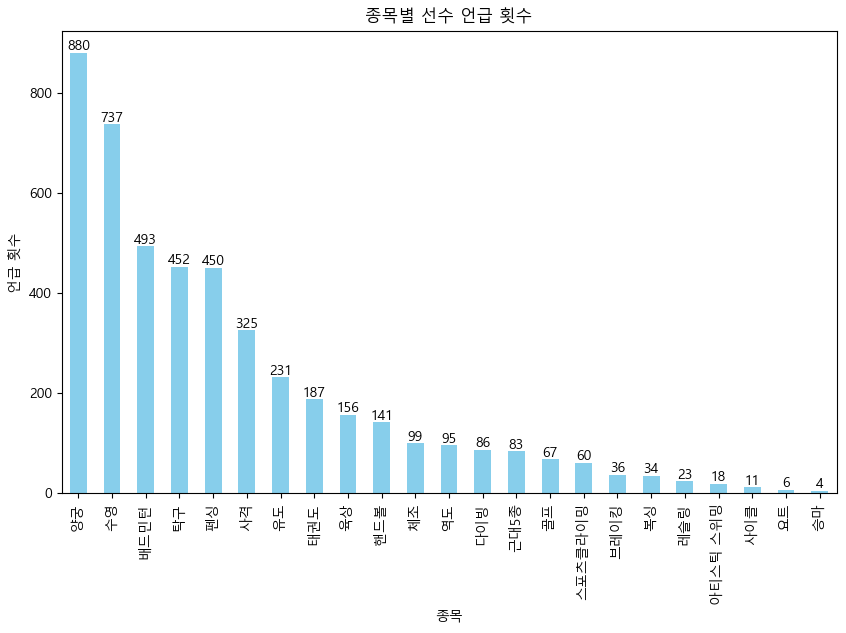

In [74]:
event_mentions = cumulative_cnt_before.groupby('event')['mentions'].sum().sort_values(ascending=False)

# 시각화
plt.figure(figsize=(10, 6))
event_mentions.plot(kind='bar', color='skyblue')
plt.title('종목별 선수 언급 횟수')
plt.xlabel('종목')
plt.ylabel('언급 횟수')
plt.xticks(rotation=90)
for idx, value in enumerate(event_mentions):
    plt.text(idx, value, str(value), ha='center', va='bottom')

plt.show()

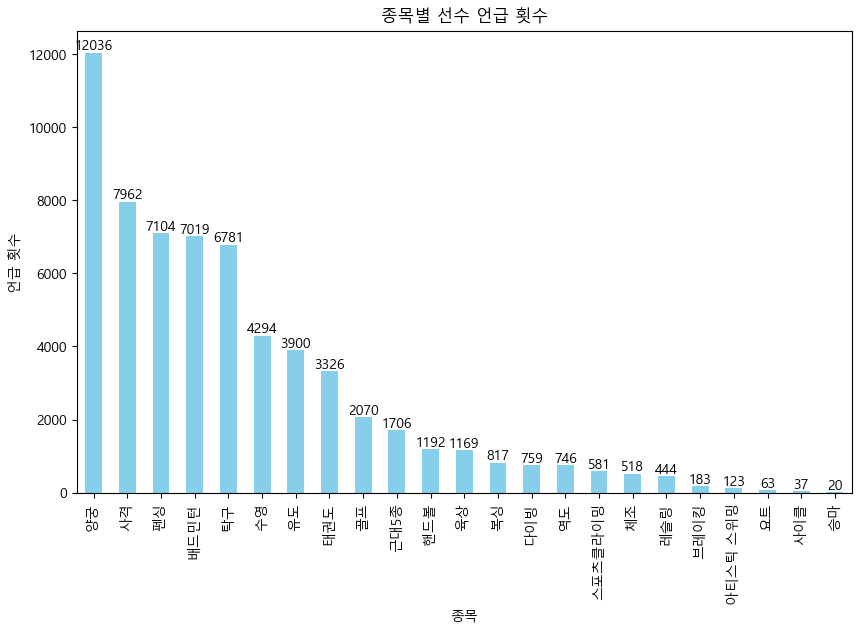

In [330]:
event_mentions = cumulative_cnt_after.groupby('event')['mentions'].sum().sort_values(ascending=False)

# 시각화
plt.figure(figsize=(10, 6))
event_mentions.plot(kind='bar', color='skyblue')
plt.title('종목별 선수 언급 횟수')
plt.xlabel('종목')
plt.ylabel('언급 횟수')
plt.xticks(rotation=90)

for idx, value in enumerate(event_mentions):
    plt.text(idx, value, str(value), ha='center', va='bottom')

plt.show()

In [331]:
# Calculate the proportion of athletes by event
olympic_data = pd.read_csv("./data/olympic_paris_players.csv", encoding="utf-8")

event_proportion = olympic_data['event'].value_counts(normalize=True) * 100
event_proportion

event
사격          11.111111
수영          10.416667
핸드볼          9.722222
펜싱           9.722222
배드민턴         8.333333
유도           7.638889
체조           5.555556
다이빙          4.166667
양궁           4.166667
탁구           4.166667
골프           3.472222
역도           3.472222
근대5종         2.777778
태권도          2.777778
레슬링          2.083333
육상           2.083333
스포츠클라이밍      2.083333
복싱           1.388889
사이클          1.388889
아티스틱 스위밍     1.388889
브레이킹         0.694444
요트           0.694444
승마           0.694444
Name: proportion, dtype: float64

In [89]:
olympic_cnt = pd.concat([cumulative_cnt_after, cumulative_cnt_before])
olympic_cnt

,name,mentions,event,gold,silver,bronze
0,안세영,3535,배드민턴,1,0,0
1,신유빈,3203,탁구,0,0,2
2,김우진,3110,양궁,3,0,0
3,임시현,3072,양궁,3,0,0
4,오상욱,2069,펜싱,2,0,0
...,...,...,...,...,...,...
138,정예린,2,유도,0,0,1
139,김민수,2,사격,0,0,0
140,임하나,1,사격,0,0,0
141,강지은,1,사격,0,0,0


In [399]:
before_count = pd.read_csv("./data/before_count.csv", encoding="utf-8")

In [335]:
after_count = pd.read_csv("./data/after_count.csv", encoding="utf-8")

In [336]:
# Drop the 'Unnamed: 0' column as it seems to be an unnecessary index
before_count = before_count.drop(columns=['Unnamed: 0'])
# Merge the two datasets based on 'name' and 'event' columns
merged_data = pd.merge(before_count, after_count, on=['name', 'event', 'gold', 'silver', 'bronze'], suffixes=('_before', '_after'))

In [78]:
merged_data

,Unnamed: 0,name,event,gold,silver,bronze,total_mentions
0,0,황선우,수영,0,0,0,1249
1,1,임시현,양궁,3,0,0,2964
2,2,김우민,수영,0,0,1,1437
3,3,신유빈,탁구,0,0,2,2939
4,4,안세영,배드민턴,1,0,0,2894
...,...,...,...,...,...,...,...
138,138,정예린,유도,0,0,1,37
139,139,송지영,핸드볼,0,0,0,14
140,140,강지은,사격,0,0,0,26
141,141,임하나,사격,0,0,0,27


In [362]:
merged_data["total_mentions"] = merged_data["mentions_before"] + merged_data["mentions_after"]

KeyError: 'mentions_before'

In [363]:
merged_data.to_csv("./data/totl_mentions.csv", encoding="utf-8")

In [2]:
merged_data = pd.read_csv("./data/totl_mentions.csv", encoding="utf-8")

## 올림픽 개최 후 종목별 선수 업급 수

In [1]:
import pandas as pd

after_count = pd.read_csv("./data/cumulative_cnt_after.csv", encoding="utf-8")

In [5]:
before_count = pd.read_csv("./data/cumulative_cnt_before.csv", encoding="utf-8")

In [4]:
after_event_mentions = after_count.groupby('event')['mentions'].sum().reset_index()

colors = plt.cm.viridis(np.linspace(0, 1, len(event_mentions)))

plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=after_event_mentions['mentions'], 
    label=after_event_mentions['event'] + "\n" + after_event_mentions['mentions'].astype(str), 
    alpha=0.8, 
    color=colors, 
    bar_kwargs=dict(linewidth=3, edgecolor="#eee")
)
plt.axis('off')
plt.title("올림픽 개최 후 종목별 선수 언급 수")
plt.show()

NameError: name 'event_mentions' is not defined

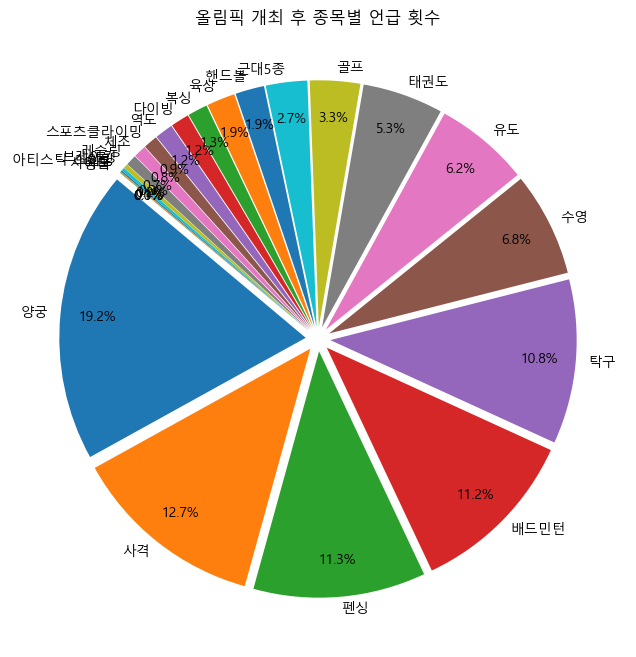

In [365]:
after_event_mentions = after_count.groupby('event')['mentions'].sum().reset_index()
after_event_mentions_sorted = after_event_mentions.sort_values(by='mentions', ascending=False)

explode = [0.05] * len(event_mentions)
plt.figure(figsize=(10, 8))
plt.pie(
    after_event_mentions_sorted['mentions'], 
    labels=after_event_mentions_sorted['event'], 
    autopct='%1.1f%%', 
    startangle=140, 
    labeldistance=1.05,  # 레이블과 파이 차트의 거리
    pctdistance=0.85,     # 퍼센트와 파이 차트의 거리
    explode=explode
)
plt.title('올림픽 개최 후 종목별 언급 횟수')
plt.show()

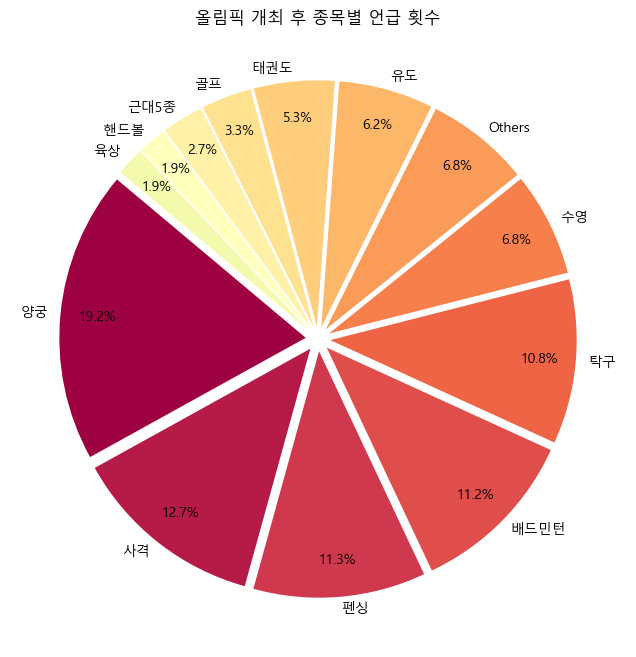

In [419]:
after_event_mentions = after_count.groupby('event')['mentions'].sum().reset_index()

# 언급횟수가 1000회 미만인 종목은 others로 처리 (2% 이하)
threshold = 1000
after_event_mentions['event'] = after_event_mentions.apply(
    lambda x: x['event'] if x['mentions'] >= threshold else 'Others', axis=1
)
after_event_mentions_combined = after_event_mentions.groupby('event')['mentions'].sum().reset_index()
after_event_mentions_sorted = after_event_mentions_combined.sort_values(by='mentions', ascending=False)

colors = plt.cm.Spectral(np.linspace(0, 1, len(after_event_mentions)))

explode = [0.05] * len(after_event_mentions_sorted)
plt.figure(figsize=(10, 8))
plt.pie(
    after_event_mentions_sorted['mentions'], 
    labels=after_event_mentions_sorted['event'], 
    autopct='%1.1f%%', 
    startangle=140, 
    labeldistance=1.05,  # 레이블과 파이 차트의 거리
    pctdistance=0.85,    # 퍼센트와 파이 차트의 거리
    explode=explode,
    colors = colors
)
plt.title('올림픽 개최 후 종목별 언급 횟수')
plt.show()


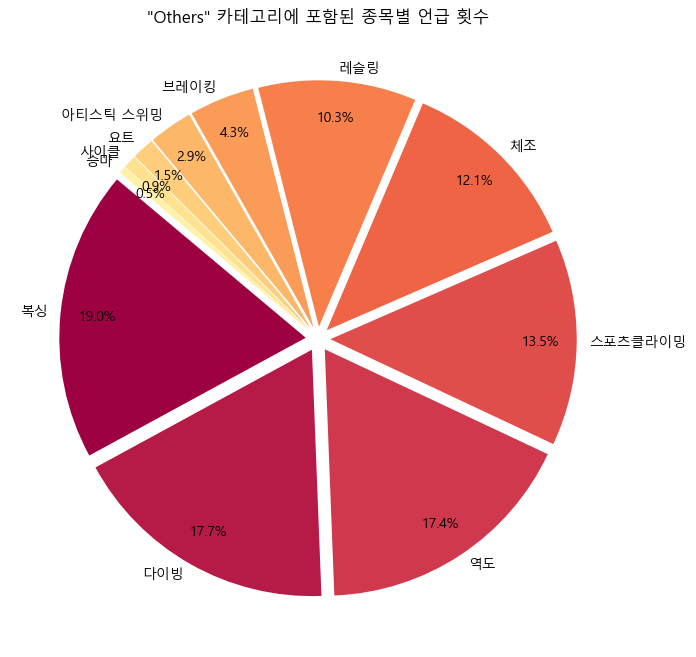

In [425]:
# Group by event and sum the mentions
after_event_mentions = after_count.groupby('event')['mentions'].sum().reset_index()

# Separate events with mentions < 1000 and combine them into one category
threshold = 1000
after_event_mentions['event_group'] = after_event_mentions.apply(
    lambda x: x['event'] if x['mentions'] >= threshold else 'Others', axis=1
)
after_event_mentions_combined = after_event_mentions.groupby('event_group')['mentions'].sum().reset_index()

# Extract the "Others" category
after_others_mentions = after_event_mentions[after_event_mentions['event_group'] == 'Others']
after_others_mentions_sorted = after_others_mentions.sort_values(by='mentions', ascending=False)

colors = plt.cm.Spectral(np.linspace(0, 1, len(after_event_mentions)))
explode = [0.05] * len(after_others_mentions_sorted)

plt.figure(figsize=(10, 8))
plt.pie(
    after_others_mentions_sorted['mentions'], 
    labels=after_others_mentions_sorted['event'], 
    autopct='%1.1f%%', 
    startangle=140, 
    labeldistance=1.05,  # 레이블과 파이 차트의 거리
    pctdistance=0.85,    # 퍼센트와 파이 차트의 거리
    colors = colors,
    explode=explode
)
plt.title('"Others" 카테고리에 포함된 종목별 언급 횟수')
plt.show()

## 올림픽 개최 전 종목별 선수 언급 수

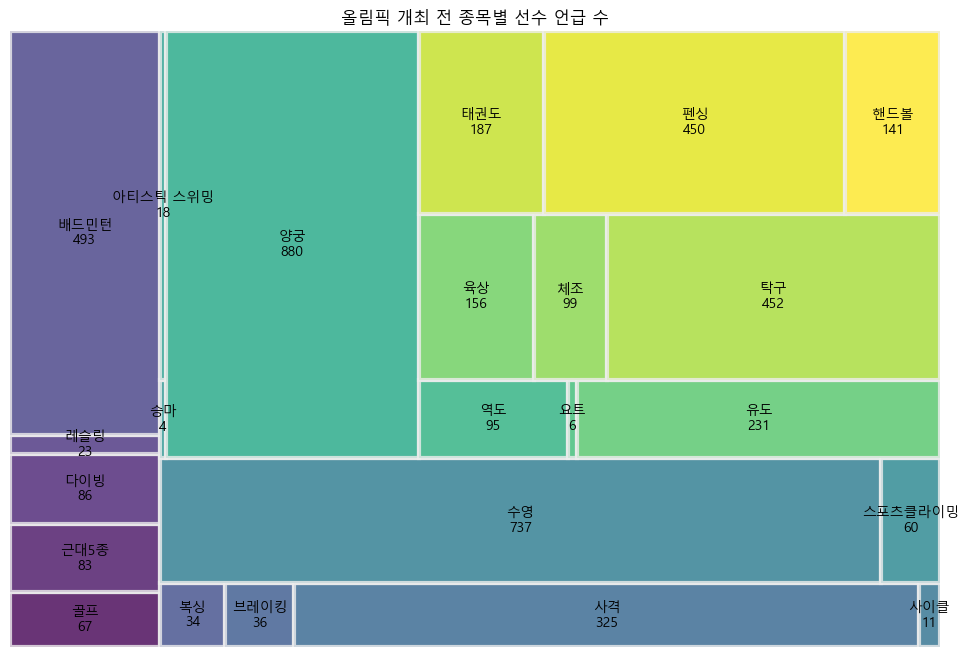

In [366]:
before_event_mentions = before_count.groupby('event')['mentions'].sum().reset_index()

colors = plt.cm.viridis(np.linspace(0, 1, len(event_mentions)))

plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=before_event_mentions['mentions'], 
    label=before_event_mentions['event'] + "\n" + before_event_mentions['mentions'].astype(str), 
    alpha=0.8, 
    color=colors, 
    bar_kwargs=dict(linewidth=3, edgecolor="#eee")
)
plt.axis('off')
plt.title("올림픽 개최 전 종목별 선수 언급 수")
plt.show()


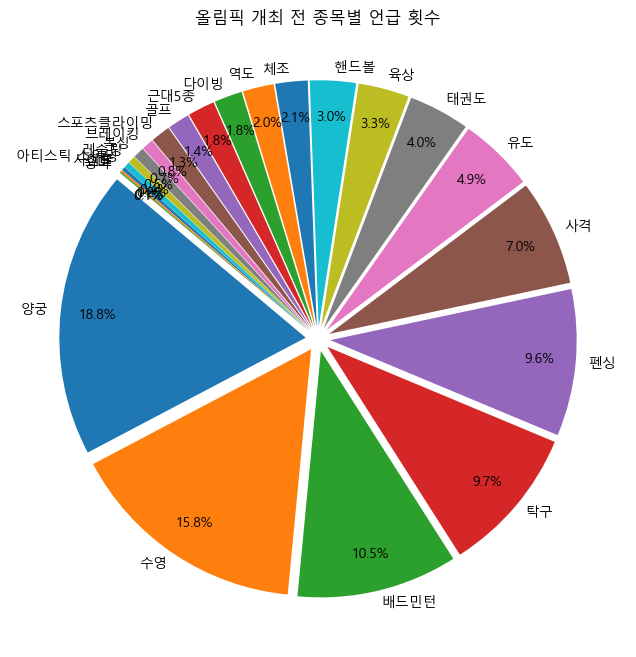

In [400]:
before_event_mentions = before_count.groupby('event')['mentions'].sum().reset_index()
before_event_mentions = before_event_mentions.sort_values(by='mentions', ascending=False)

explode = [0.05] * len(event_mentions)
plt.figure(figsize=(10, 8))
plt.pie(
    before_event_mentions['mentions'], 
    labels=before_event_mentions['event'], 
    autopct='%1.1f%%', 
    startangle=140, 
    labeldistance=1.05,   # 레이블과 파이 차트의 거리
    pctdistance=0.85,     # 퍼센트와 파이 차트의 거리
    explode=explode
)
plt.title('올림픽 개최 전 종목별 언급 횟수')
plt.show()

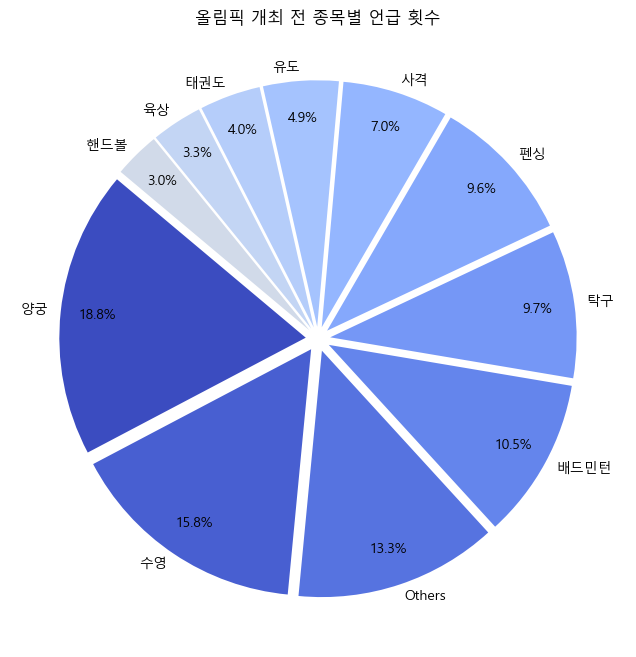

In [452]:
before_event_mentions = before_count.groupby('event')['mentions'].sum().reset_index()

#언급 횟 수가 100회 미만인 종목은 others로 처리 (3%이하)
threshold = 100
before_event_mentions['event'] = before_event_mentions.apply(
    lambda x: x['event'] if x['mentions'] >= threshold else 'Others', axis=1
)
before_event_mentions_combined = before_event_mentions.groupby('event')['mentions'].sum().reset_index()
before_event_mentions_sorted = before_event_mentions_combined.sort_values(by='mentions', ascending=False)

colors = plt.cm.coolwarm(np.linspace(0, 1, len(after_event_mentions)))
explode = [0.05] * len(before_event_mentions_sorted)

plt.figure(figsize=(10, 8))
plt.pie(
    before_event_mentions_sorted['mentions'], 
    labels=before_event_mentions_sorted['event'], 
    autopct='%1.1f%%', 
    startangle=140, 
    labeldistance=1.05,  # 레이블과 파이 차트의 거리
    pctdistance=0.85,    # 퍼센트와 파이 차트의 거리
    explode=explode,
    colors = colors
)
plt.title('올림픽 개최 전 종목별 언급 횟수')
plt.show()


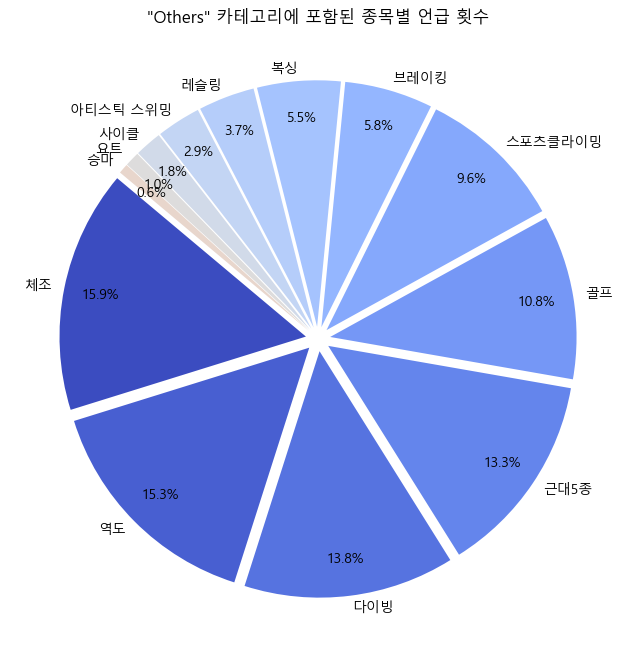

In [434]:
before_event_mentions = before_count.groupby('event')['mentions'].sum().reset_index()

threshold = 100
before_event_mentions['event_group'] = before_event_mentions.apply(
    lambda x: x['event'] if x['mentions'] >= threshold else 'Others', axis=1
)
before_event_mentions_combined = before_event_mentions.groupby('event_group')['mentions'].sum().reset_index()

before_others_mentions = before_event_mentions[before_event_mentions['event_group'] == 'Others']
before_others_mentions_sorted = before_others_mentions.sort_values(by='mentions', ascending=False)

colors = plt.cm.coolwarm(np.linspace(0, 1, len(after_event_mentions)))
explode = [0.05] * len(before_others_mentions)

plt.figure(figsize=(10, 8))
plt.pie(
    before_others_mentions_sorted['mentions'], 
    labels=before_others_mentions_sorted['event'], 
    autopct='%1.1f%%', 
    startangle=140, 
    labeldistance=1.05,  # 레이블과 파이 차트의 거리
    pctdistance=0.85,    # 퍼센트와 파이 차트의 거리
    colors = colors,
    explode = explode
)
plt.title('"Others" 카테고리에 포함된 종목별 언급 횟수')
plt.show()

## 종목별 선수 총 언급 횟수

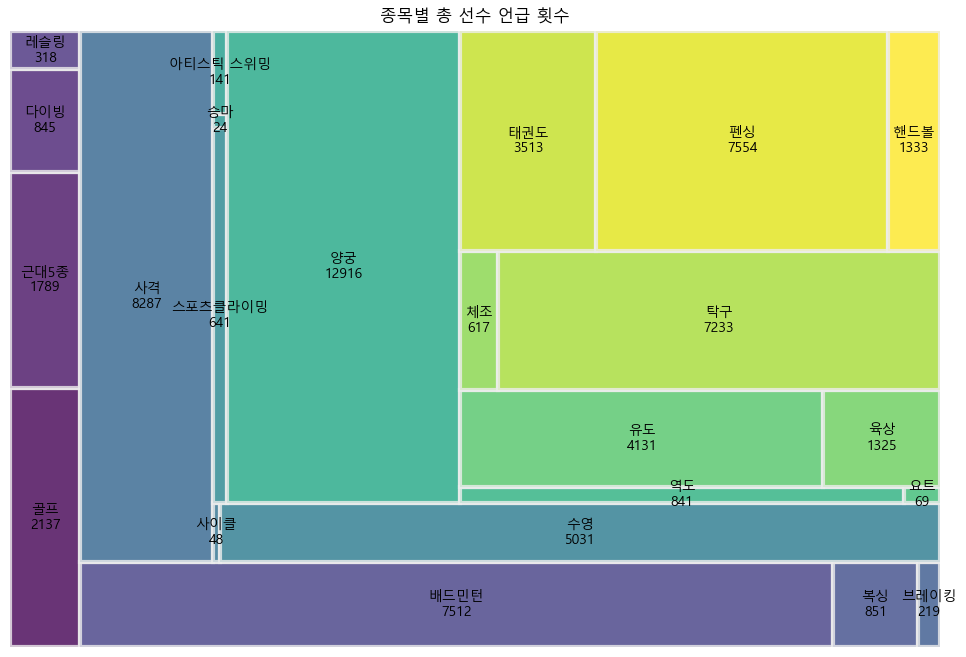

In [368]:
total_event_mentions = merged_data.groupby('event')['total_mentions'].sum().reset_index()

colors = plt.cm.viridis(np.linspace(0, 1, len(event_mentions)))

plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=total_event_mentions['total_mentions'], 
    label=total_event_mentions['event'] + "\n" + total_event_mentions['total_mentions'].astype(str), 
    alpha=0.8, 
    color=colors, 
    bar_kwargs=dict(linewidth=3, edgecolor="#eee")
    
)
plt.axis('off')
plt.title("종목별 총 선수 언급 횟수")
plt.show()


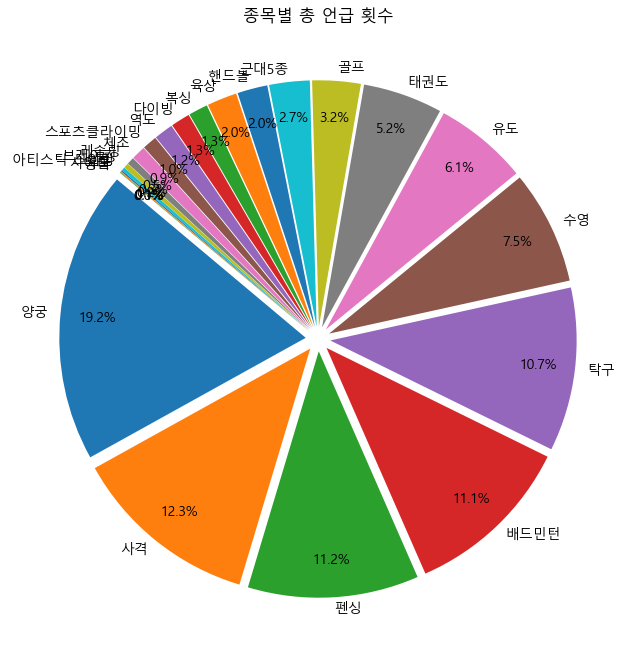

In [369]:
total_event_mentions = merged_data.groupby('event')['total_mentions'].sum().reset_index()
total_event_mentions = total_event_mentions.sort_values(by='total_mentions', ascending=False)

explode = [0.05] * len(event_mentions)
plt.figure(figsize=(10, 8))
plt.pie(
    total_event_mentions['total_mentions'], 
    labels=total_event_mentions['event'], 
    autopct='%1.1f%%', 
    startangle=140, 
    labeldistance=1.05,   # 레이블과 파이 차트의 거리
    pctdistance=0.85,     # 퍼센트와 파이 차트의 거리
    explode=explode
)
plt.title('종목별 총 언급 횟수')
plt.show()

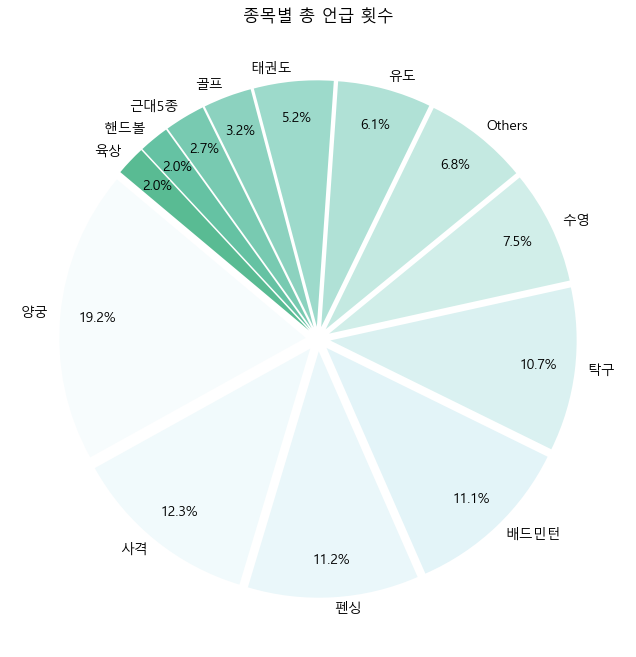

In [456]:
total_event_mentions = merged_data.groupby('event')['total_mentions'].sum().reset_index()

#언급 횟 수가 1000회 미만인 종목은 others로 처리 (3%이하)
threshold = 1000
total_event_mentions['event'] = total_event_mentions.apply(
    lambda x: x['event'] if x['total_mentions'] >= threshold else 'Others', axis=1
)
total_event_mentions_combined = total_event_mentions.groupby('event')['total_mentions'].sum().reset_index()
total_event_mentions_sorted = total_event_mentions_combined.sort_values(by='total_mentions', ascending=False)

colors = plt.cm.BuGn(np.linspace(0, 1, len(total_event_mentions)))
explode = [0.05] * len(total_event_mentions_sorted)

plt.figure(figsize=(10, 8))
plt.pie(
    total_event_mentions_sorted['total_mentions'], 
    labels=total_event_mentions_sorted['event'], 
    autopct='%1.1f%%', 
    startangle=140, 
    labeldistance=1.05,  # 레이블과 파이 차트의 거리
    pctdistance=0.85,    # 퍼센트와 파이 차트의 거리
    explode=explode,
    colors = colors
)
plt.title('종목별 총 언급 횟수')
plt.show()

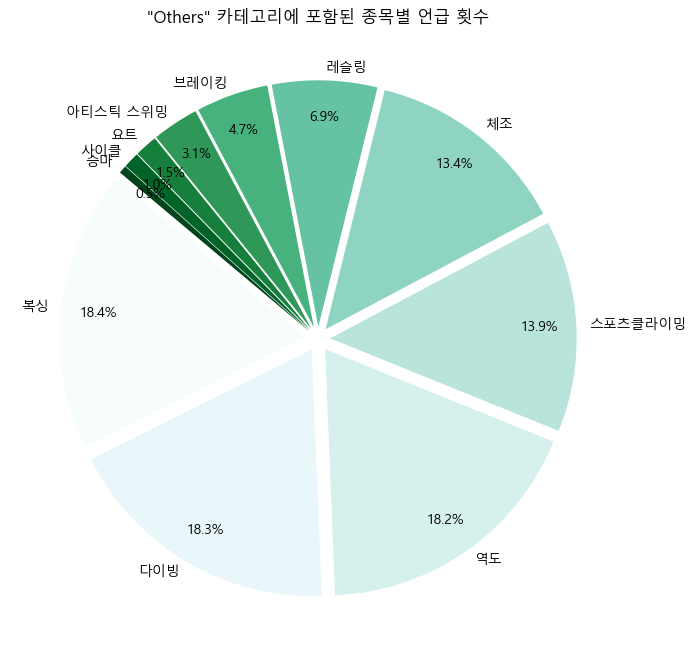

In [454]:
total_event_mentions = merged_data.groupby('event')['total_mentions'].sum().reset_index()

threshold = 1000
total_event_mentions['event_group'] = total_event_mentions.apply(
    lambda x: x['event'] if x['total_mentions'] >= threshold else 'Others', axis=1
)
total_event_mentions_combined = total_event_mentions.groupby('event_group')['total_mentions'].sum().reset_index()


total_others_mentions = total_event_mentions[total_event_mentions['event_group'] == 'Others']
total_others_mentions_sorted = total_others_mentions.sort_values(by='total_mentions', ascending=False)

colors = plt.cm.BuGn(np.linspace(0, 1, len(total_others_mentions_sorted)))
explode = [0.05] * len(total_others_mentions_sorted)

plt.figure(figsize=(10, 8))
plt.pie(
    total_others_mentions_sorted['total_mentions'], 
    labels=total_others_mentions_sorted['event'], 
    autopct='%1.1f%%', 
    startangle=140, 
    labeldistance=1.05,  # 레이블과 파이 차트의 거리
    pctdistance=0.85,    # 퍼센트와 파이 차트의 거리
    colors=colors,
    explode=explode
)
plt.title('"Others" 카테고리에 포함된 종목별 언급 횟수')
plt.show()

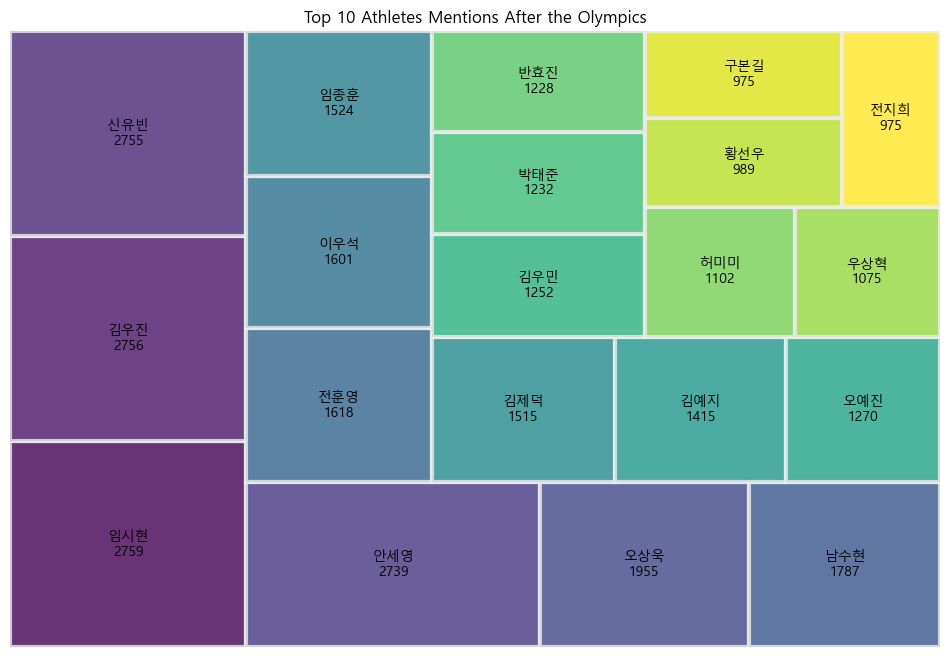

In [370]:
mentions = after_count.groupby('name')['mentions'].sum().reset_index().sort_values(by='mentions', ascending=False).head(20)

colors = plt.cm.viridis(np.linspace(0, 1, len(top_10_mentions)))

plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=mentions['mentions'], 
    label=mentions['name'] + "\n" + mentions['mentions'].astype(str), 
    alpha=0.8, 
    color=colors, 
    bar_kwargs=dict(linewidth=3, edgecolor="#eee")
)
plt.axis('off')
plt.title("Top 10 Athletes Mentions After the Olympics")
plt.show()

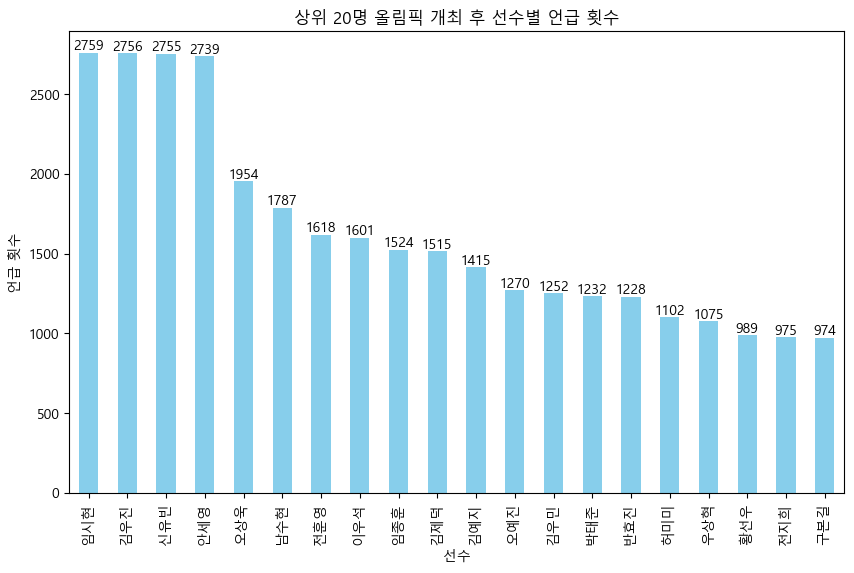

In [6]:
top_20_athletes = after_count.groupby('name')['mentions'].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))
top_20_athletes.plot(
    kind='bar', 
    color='skyblue')
plt.title('상위 20명 올림픽 개최 후 선수별 언급 횟수')
plt.xlabel('선수')
plt.ylabel('언급 횟수')
plt.xticks(rotation=90)

for idx, value in enumerate(top_20_athletes):
    plt.text(idx, value, str(value), ha='center', va='bottom')

plt.show()

In [8]:
medal_cnt = pd.read_csv("./data/medals_cnt.csv", encoding="utf-8")

In [15]:
medal_cnt

,Unnamed: 0,금메달,은메달,동메달
0,20240715,6,5,2
1,20240716,15,9,6
2,20240717,7,3,3
3,20240718,31,19,19
4,20240719,43,25,24
5,20240720,52,24,18
6,20240721,77,30,24
7,20240722,95,34,21
8,20240723,173,110,91
9,20240724,239,83,95


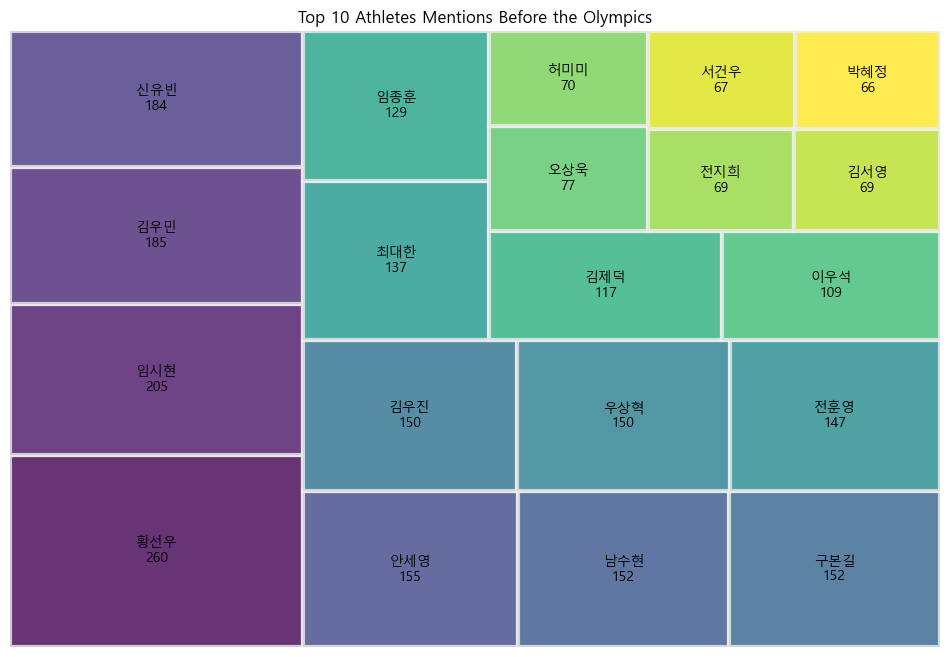

In [372]:
mentions = before_count.groupby('name')['mentions'].sum().reset_index().sort_values(by='mentions', ascending=False).head(20)

colors = plt.cm.viridis(np.linspace(0, 1, len(top_10_mentions)))

plt.figure(figsize=(12, 8))
squarify.plot(
    sizes=mentions['mentions'], 
    label=mentions['name'] + "\n" + mentions['mentions'].astype(str), 
    alpha=0.8, 
    color=colors, 
    bar_kwargs=dict(linewidth=3, edgecolor="#eee")
)
plt.axis('off')
plt.title("Top 10 Athletes Mentions Before the Olympics")
plt.show()

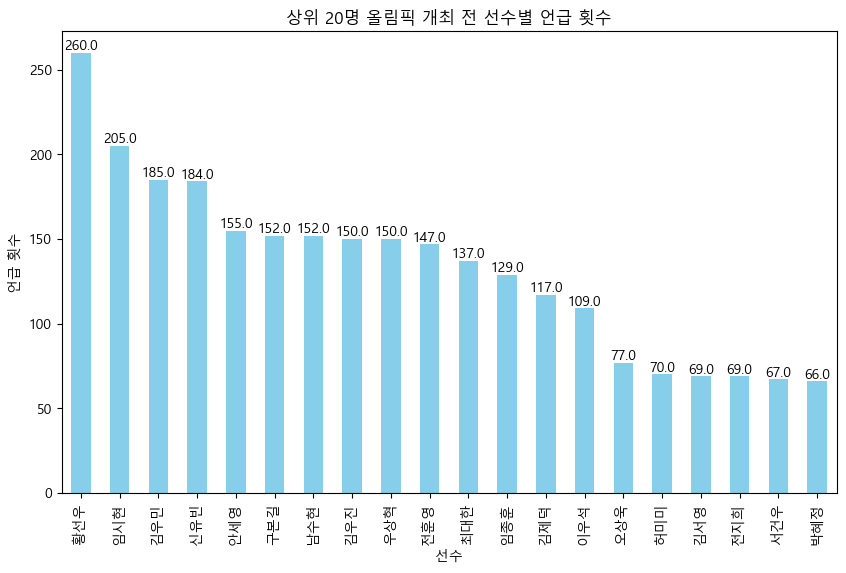

In [7]:
top_20_athletes = before_count.groupby('name')['mentions'].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))
top_20_athletes.plot(
    kind='bar', 
    color='skyblue')
plt.title('상위 20명 올림픽 개최 전 선수별 언급 횟수')
plt.xlabel('선수')
plt.ylabel('언급 횟수')
plt.xticks(rotation=90)

for idx, value in enumerate(top_20_athletes):
    plt.text(idx, value, str(value), ha='center', va='bottom')

plt.show()

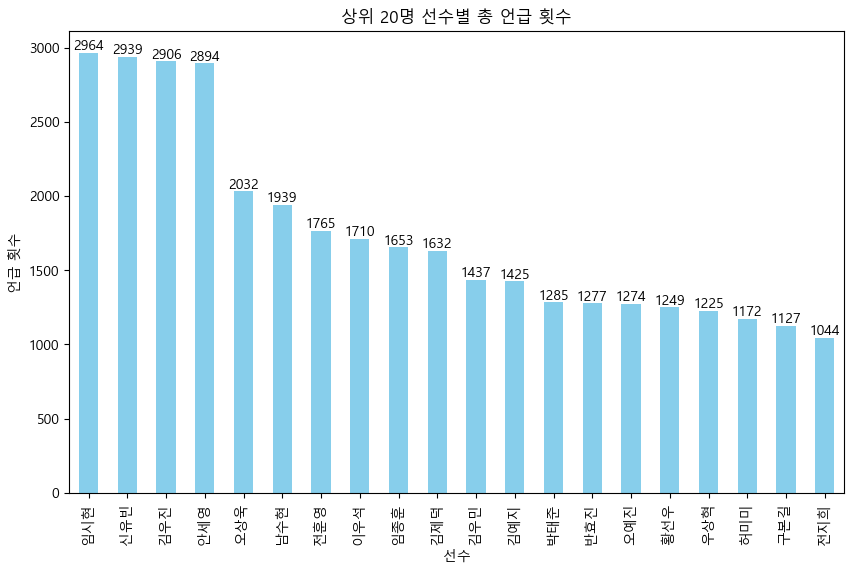

In [5]:
top_20_athletes = merged_data.groupby('name')['total_mentions'].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))
top_20_athletes.plot(
    kind='bar', 
    color='skyblue')
plt.title('상위 20명 선수별 총 언급 횟수')
plt.xlabel('선수')
plt.ylabel('언급 횟수')
plt.xticks(rotation=90)

for idx, value in enumerate(top_20_athletes):
    plt.text(idx, value, str(value), ha='center', va='bottom')

plt.show()

In [374]:
total_mention = pd.read_csv("./data/totl_mentions.csv", encoding="utf-8")

In [375]:
# 2. 특정 횟수 이상 언급된 선수들이 실제 메달을 땄는지 여부 분석(1000회 기준)
filtered_data['medal_won'] = filtered_data[['gold', 'silver', 'bronze']].sum(axis=1) > 0
medal_analysis = filtered_data['medal_won'].value_counts(normalize=True) * 100
medal_analysis

medal_won
True     87.5
False    12.5
Name: proportion, dtype: float64

In [376]:
expectation_vs_reality_sorted = expectation_vs_reality.sort_values(by='total_mentions', ascending=False)

In [377]:
expectation_vs_reality_sorted

,total_mentions,gold,silver,bronze
name,,,,
안세영,3740,1,0,0
신유빈,3425,0,0,2
임시현,3304,3,0,0
김우진,3281,3,0,0
오상욱,2152,2,0,0
남수현,2106,1,1,0
이우석,1886,1,0,1
전훈영,1867,1,0,0
김제덕,1746,1,0,0


In [378]:
# 1. 특정 횟수 이상 언급된 선수들의 종목 비율 계산
threshold = 1000  # 예시로 1000회 이상 언급된 선수들로 설정
filtered_data = total_mention[total_mention['total_mentions'] >= threshold]

# 종목별 비율 계산
event_proportion = filtered_data['event'].value_counts(normalize=True) * 100
event_proportion

event
양궁      30.0
탁구      15.0
사격      15.0
수영      10.0
펜싱      10.0
배드민턴     5.0
육상       5.0
유도       5.0
태권도      5.0
Name: proportion, dtype: float64

In [379]:
# 1. 어떤 종목, 선수에 대한 기대가 높았는지 (대중의 기대감) 분석
# 종목별 언급 횟수 총합 계산
event_expectation = before_count.groupby('event')['mentions'].sum().reset_index()
event_expectation

,event,mentions
0,골프,67
1,근대5종,83
2,다이빙,86
3,레슬링,23
4,배드민턴,493
5,복싱,34
6,브레이킹,36
7,사격,325
8,사이클,11
9,수영,737


In [380]:
# 선수별 언급 횟수 상위 10명 추출
top_10_athletes = before_count.sort_values(by='mentions', ascending=False).head(10)
top_10_athletes

,name,mentions,event,gold,silver,bronze
0,황선우,260,수영,0,0,0
1,임시현,205,양궁,3,0,0
2,김우민,185,수영,0,0,1
3,신유빈,184,탁구,0,0,2
4,안세영,155,배드민턴,1,0,0
5,남수현,152,양궁,1,1,0
6,구본길,152,펜싱,1,0,0
7,김우진,150,양궁,3,0,0
8,우상혁,150,육상,0,0,0
9,전훈영,147,양궁,1,0,0


In [381]:
# 2. 전체 선수들의 출전 종목 비율 계산
total_event_proportion = before_count['event'].value_counts(normalize=True) * 100
total_event_proportion

event
사격          11.188811
수영          10.489510
펜싱           9.790210
핸드볼          9.790210
배드민턴         8.391608
유도           7.692308
체조           5.594406
탁구           4.195804
다이빙          4.195804
양궁           4.195804
역도           3.496503
골프           3.496503
근대5종         2.797203
태권도          2.797203
스포츠클라이밍      2.097902
육상           2.097902
복싱           1.398601
레슬링          1.398601
아티스틱 스위밍     1.398601
사이클          1.398601
브레이킹         0.699301
요트           0.699301
승마           0.699301
Name: proportion, dtype: float64